In [5]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# First let's load the cleaned data set
df = pd.read_pickle('LA_df.pkl')

### Question 1: Can you count something interesting?

Number of clear days: 19187
Percentage of clear days: 70.92 percent


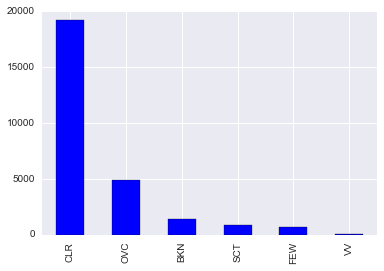

In [12]:
# Let's count the number of days where the sky condition was clear and make a bar plot of all the sky conditions
n_clr = len(df[df['hourlyskyconditions'] == 'CLR'])
print('Number of clear days: %d' % n_clr)
print('Percentage of clear days: %.2f percent' % (float(n_clr)/float(len(df)) * 100))
df['hourlyskyconditions'].value_counts().plot(kind='bar')
# From this plot we can conclude that most days were clear in LA, followed by small fractions of other sky conditions, like overcast, broken clouds, scattered clouds, few clouds, and obscured.
# From this insight we might ask how cloud coverage depends on season and how it affects electricity statistics

### Question 2: Can you find trends?

In [28]:
# Let's look at the correlations between electricity demand and the other variables to find trends
print('Demand correlations (Pearson)')
print(df.corr()['demand'].sort_values(ascending=False)[1:])
'''
The number printed are the values of Pearson correlation coefficients between demand and the other variables. Here we can see a positive trend between electricity generation/daily cooling degrees and demand. Similarly, we can see a negative trend between hourly heating degrees/sea level pressure and demand. From these results we might ask if there are certain seasons where the trends are stronger/weaker.'''

Demand correlations (Pearson)
generation                0.908847
dailycoolingdegreedays    0.572276
hourlydewpointtempf       0.383213
hourlyrelativehumidity    0.365103
hourlywetbulbtempf        0.302196
hourlycoolingdegrees      0.192905
hourlydrybulbtempf        0.044270
hourlyvisibility          0.009680
hourlyprecip             -0.022647
dailyheatingdegreedays   -0.221490
hourlywindspeed          -0.232066
interchange              -0.265373
hourlystationpressure    -0.265683
hourlysealevelpressure   -0.266114
hourlyaltimetersetting   -0.267421
hourlyheatingdegrees     -0.290985
Name: demand, dtype: float64


### Question 3: Can you make a bar plot or a histogram?

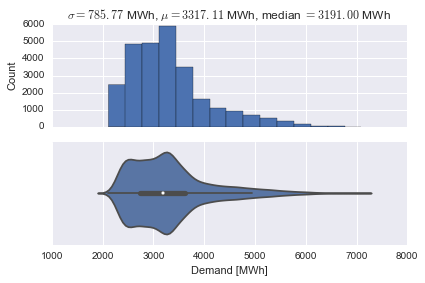

In [33]:
# Let's make a histogram and violin plot of electricity demand with some additional statistics
fig,ax = plt.subplots(2, sharex=True)
plot_data = df['demand']
ax[0].hist(plot_data, bins=15)
title_text = r'$\sigma = %.2f$ MWh, $\mu = %.2f$ MWh, median $= %.2f$ MWh' % (plot_data.std(), plot_data.mean(), plot_data.median())
sns.violinplot(plot_data, ax=ax[1])
ax[0].set_ylabel('Count', labelpad=5)
ax[1].set_xlabel('Demand [MWh]')
ax[0].set_title(title_text, size=12)
plt.tight_layout()
'''
From these visualizations we might ask when electricity demand is above 6000 MWh and investigate what might cause relatively large increases in demand over time'''

### Questions 4 & 5: Can you compare two related quantities? & Can you make a scatterplot?

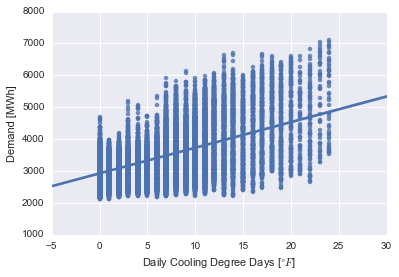

In [38]:
# Let's compare daily cooling degree days and electricity demand using a scatter plot
# As shown above, these variables have a positive correlation
fig,ax = plt.subplots()
sns.regplot(df['dailycoolingdegreedays'], df['demand'], ax=ax)
ax.set_xlabel(r'Daily Cooling Degree Days [$\degree F$]')
ax.set_ylabel(r'Demand [MWh]')
'''
Although Daily cooling degree days in a discretized variable, we can clearly see a relationship between variables. Cooling degree days are defined as the number of degrees above 65 degrees F, so they can be thought of as a measure of the cooling needed to retain a certain temperature, and thus as a strong proxy for electricity demand. This hypothesis and line of thinking is confirmed in the scatter plot and previous correlations'''

### Question 6: Can you make a time-series plot?

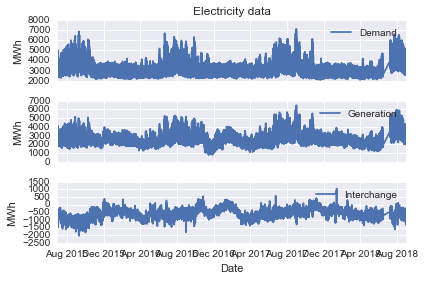

In [40]:
# Let's plot all the electricity data in a time series plot
fig,ax = plt.subplots(3,sharex=True)
ax[0].plot(df['demand'], label='Demand')
ax[1].plot(df['generation'], label='Generation')
ax[2].plot(df['interchange'], label='Interchange')
ax[0].set_title('Electricity data')
ax[0].set_ylabel('MWh')
ax[1].set_ylabel('MWh')
ax[2].set_ylabel('MWh')
ax[2].set_xlabel('Date')
ax[0].legend()
ax[1].legend()
ax[2].legend()
plt.tight_layout()
# General trends can be seen throughout between electricity data time streams, indicating the demand, generation, and interchange are closely related as we would expect. Also these plots confirm another previous hypothesis--that electricity demand is seasonally dependent. We can see that summer months in general see an increase in demand and generation.